In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df_data = pd.read_csv("../Data/preprocessed_alcohol_balance_perperson.csv")
# display(df_data)
print(list(df_data))
print(df_data.shape)

['Conditie', 'SubjectID', 'Height', 'Weight', 'Age', 'BMI', 'Alcohol', 'Alcohol_Class', 'Balance_MLrange', 'Balance_MLstdev', 'Balance_MLmeanVelocity', 'Balance_APrange', 'Balance_APstdev', 'Balance_APmeanVelocity', 'Balance_MeanVelocity', 'GaitVelocity', 'MovementVelocity', 'std_SegmentData', 'mad_SegmentData', 'mean_StepLength', 'Velocity']
(308, 21)


In [61]:
df_data = df_data[df_data.Conditie == "norm"]
print(df_data.shape)

(154, 21)


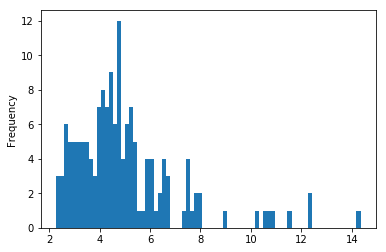

In [62]:
df_data = df_data.sort_values("Balance_MeanVelocity")
df_data["Balance_MeanVelocity"].plot.hist(bins=75)

In [68]:
# df_data["Balance_MeanVelocity_Class"] = pd.qcut(df_data['Balance_MeanVelocity'], 2, labels=[1, 0])

In [64]:
df_data = df_data.sort_values("SubjectID")

In [69]:
# display(df_data)
# df_data.to_csv(path_or_buf="../Data/preprocessed_balance_perperson_nobril_equal.csv", index=False)

In [74]:
df_new = df_data

for i, _ in df_new.iterrows(): 
    if df_new["Balance_MeanVelocity"][i] <= 6: 
        df_new["Balance_MeanVelocity_Class"][i] = 1
    if df_new["Balance_MeanVelocity"][i] > 6: 
        df_new["Balance_MeanVelocity_Class"][i] = 0

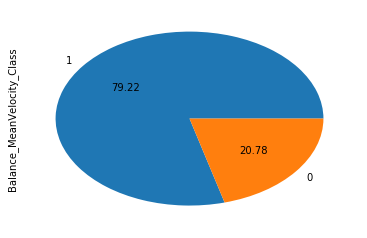

In [76]:
# PIECHARTS
headers = [
 "Balance_MeanVelocity_Class"]

for header in headers:
    perc = pd.DataFrame(df_new[header].value_counts(normalize=True) * 100).sort_index()
    perc.plot.pie(subplots=True, autopct='%.2f', legend=False)
    plt.show()
    
# display(df_new)

In [78]:
df_new.to_csv(path_or_buf="../Data/preprocessed_balance_perperson_nobril_80-20.csv", index=False)

In [82]:
df_newnew = df_data
df_newnew["Balance_MeanVelocity_Class"] = pd.qcut(df_data['Balance_MeanVelocity'], 3, labels=["good", "medium", "bad" ])
df_newnew = df_newnew.sort_values("SubjectID")
df_newnew.to_csv(path_or_buf="../Data/preprocessed_balance_perperson_nobril_three_equal.csv", index=False)